In [1]:
import psycopg2
import pandas as pd
# Connection parameters, yours will be different
param_dic = {
    "host"      : "localhost",
    "database"  : "postgres",
    "user"      : "postgres",
    "password"  : "2000"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn
 

In [2]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [3]:
# Connect to the database
conn = connect(param_dic)
column_names = ["flight_id","timee","xyz0","xyz1","xyz2","typee"]
# Execute the "SELECT *" query
ang_vel = postgresql_to_dataframe(conn, "select * from ang_vel", column_names)
ang_vel.head()

Connecting to the PostgreSQL database...
Connection successful


,flight_id,timee,xyz0,xyz1,xyz2,typee
0,68,1970-01-01 00:00:00.367386,-0.143561,0.156800,-0.083174,vehicle_angular_velocity_0
1,68,1970-01-01 00:00:00.367388,-0.146729,0.154581,-0.082681,vehicle_angular_velocity_0
2,68,1970-01-01 00:00:00.367408,-0.178442,0.136067,-0.090833,vehicle_angular_velocity_0
3,68,1970-01-01 00:00:00.367426,-0.149040,0.122860,-0.095668,vehicle_angular_velocity_0
4,68,1970-01-01 00:00:00.367448,-0.158996,0.100193,-0.101502,vehicle_angular_velocity_0


In [4]:
# Connect to the database
conn = connect(param_dic)
column_names = ["flight_id","timee","lat","lon","alt"]
# Execute the "SELECT *" query
gps= postgresql_to_dataframe(conn, "select * from gps", column_names)
gps.head()

Connecting to the PostgreSQL database...
Connection successful


,flight_id,timee,lat,lon,alt
0,68,00:00:00.367295,40.137826,32.548747,0.093732
1,68,00:00:00.367455,40.137826,32.548747,0.093732
2,68,00:00:00.367850,40.137826,32.548746,0.093730
3,68,00:00:00.368248,40.137827,32.548745,0.093730
4,68,00:00:00.368850,40.137826,32.548745,0.093731


In [5]:
# Connect to the database
conn = connect(param_dic)
column_names = ["flight_id","model_id","mission_id","flight_date","landing_date",
               "landing_success","flight_success","flight_county","flight_province",
               "flight_region","real_flight_time","mission_success"]
# Execute the "SELECT *" query
flight = postgresql_to_dataframe(conn, "select * from flight", column_names)
flight.head()

Connecting to the PostgreSQL database...
Connection successful


,flight_id,model_id,mission_id,flight_date,landing_date,landing_success,flight_success,flight_county,flight_province,flight_region,real_flight_time,mission_success
0,68,3,2,2022-09-08 11:01:00,2022-09-08 11:02:09.630734,t,t,Kahramankazan,Ankara,İç Anadolu Bölgesi,00:02:43,t
1,69,3,2,2022-09-08 13:42:00,2022-09-08 13:42:58.787339,t,t,Kahramankazan,Ankara,İç Anadolu Bölgesi,00:00:00,f


In [6]:
flight.info() # BASIS  FIRST-LOOK 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   flight_id         2 non-null      int64         
 1   model_id          2 non-null      int64         
 2   mission_id        2 non-null      int64         
 3   flight_date       2 non-null      datetime64[ns]
 4   landing_date      2 non-null      datetime64[ns]
 5   landing_success   2 non-null      object        
 6   flight_success    2 non-null      object        
 7   flight_county     2 non-null      object        
 8   flight_province   2 non-null      object        
 9   flight_region     2 non-null      object        
 10  real_flight_time  2 non-null      object        
 11  mission_success   2 non-null      object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 320.0+ bytes


In [7]:
flight.describe() #DESCRIPTIVE STATISTICS

,flight_id,model_id,mission_id
count,2.000000,2.0,2.0
mean,68.500000,3.0,2.0
std,0.707107,0.0,0.0
min,68.000000,3.0,2.0
25%,68.250000,3.0,2.0
50%,68.500000,3.0,2.0
75%,68.750000,3.0,2.0
max,69.000000,3.0,2.0


In [8]:
gps.head() # FIRST 5 ROWS

,flight_id,timee,lat,lon,alt
0,68,00:00:00.367295,40.137826,32.548747,0.093732
1,68,00:00:00.367455,40.137826,32.548747,0.093732
2,68,00:00:00.367850,40.137826,32.548746,0.093730
3,68,00:00:00.368248,40.137827,32.548745,0.093730
4,68,00:00:00.368850,40.137826,32.548745,0.093731


In [9]:
gps.describe() #DESCRIPTIVE STATISTICS

,flight_id,lat,lon,alt
count,435.000000,435.000000,435.000000,435.000000
mean,68.213793,40.119046,32.557944,0.102883
std,0.410455,0.036305,0.020006,0.012345
min,68.000000,40.049586,32.542902,0.081838
25%,68.000000,40.134027,32.545054,0.094356
50%,68.000000,40.137902,32.548745,0.108835
75%,68.000000,40.139505,32.552647,0.113733
max,69.000000,40.140395,32.595959,0.114328


In [10]:
ang_vel.info()  # BASIS  FIRST-LOOK 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10801 entries, 0 to 10800
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   flight_id  10801 non-null  int64         
 1   timee      10801 non-null  datetime64[ns]
 2   xyz0       10801 non-null  float64       
 3   xyz1       10801 non-null  float64       
 4   xyz2       10801 non-null  float64       
 5   typee      10801 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 506.4+ KB


In [11]:
ang_vel.head() # FIRST 5 ROWS

,flight_id,timee,xyz0,xyz1,xyz2,typee
0,68,1970-01-01 00:00:00.367386,-0.143561,0.156800,-0.083174,vehicle_angular_velocity_0
1,68,1970-01-01 00:00:00.367388,-0.146729,0.154581,-0.082681,vehicle_angular_velocity_0
2,68,1970-01-01 00:00:00.367408,-0.178442,0.136067,-0.090833,vehicle_angular_velocity_0
3,68,1970-01-01 00:00:00.367426,-0.149040,0.122860,-0.095668,vehicle_angular_velocity_0
4,68,1970-01-01 00:00:00.367448,-0.158996,0.100193,-0.101502,vehicle_angular_velocity_0


In [12]:
ang_vel.describe() #DESCRIPTIVE STATISTICS

,flight_id,xyz0,xyz1,xyz2
count,10801.000000,10801.000000,10801.000000,10801.000000
mean,68.213314,0.000763,0.083094,-0.001696
std,0.409666,0.275902,0.255333,0.205654
min,68.000000,-2.193210,-1.218327,-0.716331
25%,68.000000,-0.110651,-0.032116,-0.084549
50%,68.000000,0.000571,0.011874,0.000354
75%,68.000000,0.117936,0.152513,0.084992
max,69.000000,1.941369,1.132385,0.783938


In [13]:
gps.corr(method='pearson') # DO CORRELATION TEST

,flight_id,lat,lon,alt
flight_id,1.000000,-0.998619,0.989678,-0.866966
lat,-0.998619,1.000000,-0.995038,0.858214
lon,0.989678,-0.995038,1.000000,-0.838310
alt,-0.866966,0.858214,-0.838310,1.000000


In [14]:
ang_vel.corr(method='pearson') # DO CORRELATION TEST

,flight_id,xyz0,xyz1,xyz2
flight_id,1.000000,-0.002273,-0.169081,0.003678
xyz0,-0.002273,1.000000,0.085170,-0.092967
xyz1,-0.169081,0.085170,1.000000,0.038782
xyz2,0.003678,-0.092967,0.038782,1.000000


In [15]:
x_range=ang_vel["xyz0"]   # ASSIGMENT
y_range=ang_vel["xyz1"]    # ASSIGMENT

In [16]:
anom1=pd.concat([x_range,y_range],1) # AGGREGATE TWO COLUMNS

C:\Users\PC\AppData\Local\Temp\ipykernel_4872\621939035.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  anom1=pd.concat([x_range,y_range],1) # AGGREGATE TWO COLUMNS


In [17]:
anom1.head()

,xyz0,xyz1
0,-0.143561,0.156800
1,-0.146729,0.154581
2,-0.178442,0.136067
3,-0.149040,0.122860
4,-0.158996,0.100193


In [18]:
anom1.describe()  # DESCRIPTIVE STATISTICS

,xyz0,xyz1
count,10801.000000,10801.000000
mean,0.000763,0.083094
std,0.275902,0.255333
min,-2.193210,-1.218327
25%,-0.110651,-0.032116
50%,0.000571,0.011874
75%,0.117936,0.152513
max,1.941369,1.132385


In [19]:
anom1[abs(anom1["xyz0"] - anom1["xyz1"])>=2.2531600000000003] # max difference

,xyz0,xyz1
9315,-2.19321,0.05995


In [20]:
radical=anom1[abs(anom1["xyz0"] - anom1["xyz1"])>=2.2531600000000003*0.3] #threshold max difference %30

In [21]:
import numpy as np
radical_index=list(radical.index)
a = np.array(radical_index) # flatten index
a=a.flatten()


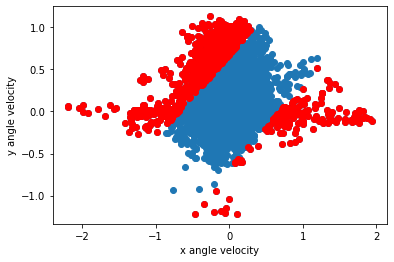

In [22]:

import matplotlib.pyplot as plt

plt.scatter(anom1["xyz0"], anom1["xyz1"])
plt.scatter(radical["xyz0"],radical["xyz1"], color='r')
plt.xlabel("x angle velocity")
plt.ylabel("y angle velocity")
plt.show()


In [23]:
radical_t=ang_vel[["timee"]].filter(items=a,axis=0)
radical_t  #ANOMALY TİME

,timee
213,1970-01-01 00:00:00.371626
214,1970-01-01 00:00:00.371648
215,1970-01-01 00:00:00.371668
216,1970-01-01 00:00:00.371688
217,1970-01-01 00:00:00.371706
...,...
9405,1970-01-01 00:00:00.076895
9406,1970-01-01 00:00:00.076918
10556,1970-01-01 00:00:00.099915
10557,1970-01-01 00:00:00.099935


Text(0, 0.5, 'anomaly time')

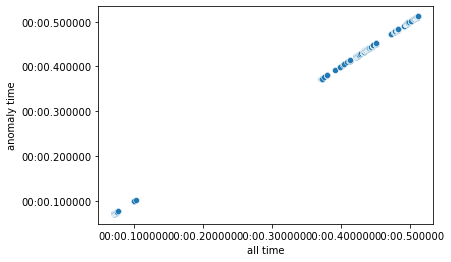

In [24]:
import seaborn as sns
sns.scatterplot(x=ang_vel["timee"],y=radical_t["timee"]) # radical time show blue
plt.xlabel("all time")
plt.ylabel("anomaly time")

In [25]:
gps.head() # FIRST 5 ROW

,flight_id,timee,lat,lon,alt
0,68,00:00:00.367295,40.137826,32.548747,0.093732
1,68,00:00:00.367455,40.137826,32.548747,0.093732
2,68,00:00:00.367850,40.137826,32.548746,0.093730
3,68,00:00:00.368248,40.137827,32.548745,0.093730
4,68,00:00:00.368850,40.137826,32.548745,0.093731


<AxesSubplot:xlabel='lat', ylabel='alt'>

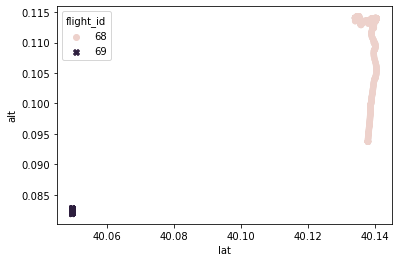

In [26]:
import seaborn as sns
sns.scatterplot(data=gps, x="lat", y="alt", hue="flight_id", style="flight_id",marker="+")

#RELATIONSHIP LAT AND ALT

<AxesSubplot:xlabel='lat', ylabel='lon'>

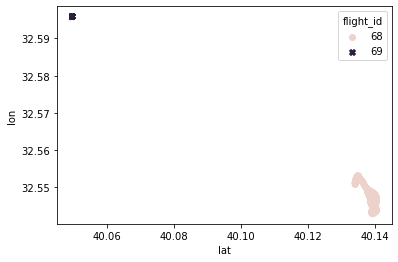

In [27]:
sns.scatterplot(data=gps, x="lat", y="lon", hue="flight_id", style="flight_id",marker="+")

#RELATIONSHIP LAT AND LON

<AxesSubplot:xlabel='lon', ylabel='alt'>

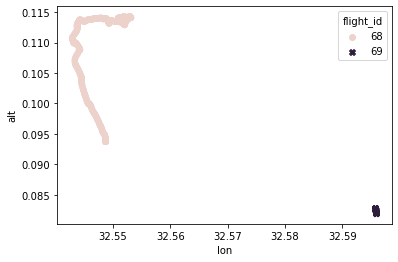

In [28]:
sns.scatterplot(data=gps, x="lon", y="alt", hue="flight_id", style="flight_id",marker="+")

#RELATIONSHIP LON AND ALT

<AxesSubplot:xlabel='xyz0', ylabel='xyz1'>

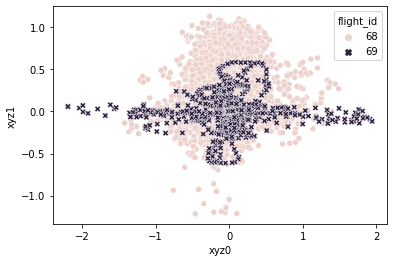

In [29]:
sns.scatterplot(data=ang_vel, x="xyz0", y="xyz1", hue="flight_id", style="flight_id")

#RELATION X AN Y ANGULAR VELOCİTY

<AxesSubplot:xlabel='xyz0', ylabel='xyz2'>

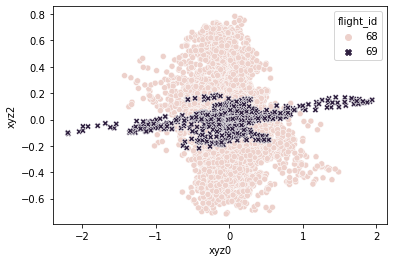

In [30]:
sns.scatterplot(data=ang_vel, x="xyz0", y="xyz2", hue="flight_id", style="flight_id")

#RELATION X AN Z ANGULAR VELOCİTY

<AxesSubplot:xlabel='xyz1', ylabel='xyz2'>

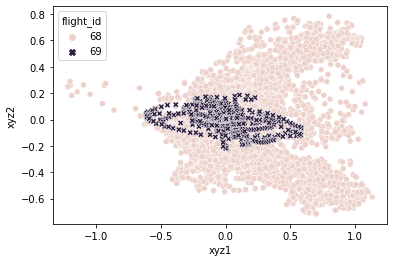

In [31]:
sns.scatterplot(data=ang_vel, x="xyz1", y="xyz2", hue="flight_id", style="flight_id")

#RELATION Y AN Z ANGULAR VELOCİTY

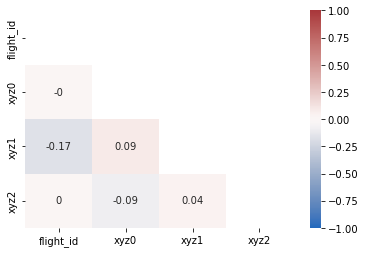

In [32]:
# Showing only the bottom half of our correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


matrix = ang_vel.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

#CORRELATION MATRIX 

# IF CORRELATION COFFICIENT X>0.8 STROGNLY POSITIVE CORRELATION
#                           X <-0.8 STRONGLY NEGATIVE CORRELATION

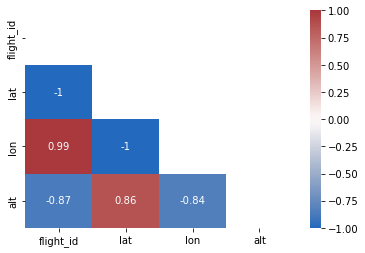

In [33]:
# Showing only the bottom half of our correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


matrix = gps.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()
#CORRELATION MATRIX 

# IF CORRELATION COFFICIENT X>0.8 STROGNLY POSITIVE CORRELATION
#                           X <-0.8 STRONGLY NEGATIVE CORRELATION

In [34]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(gps["alt"], gps["lon"])

#p_value <0.01  that assocation is  high significance

(-0.8383102731593436, 3.85512195464779e-116)

In [35]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(gps["alt"], gps["lat"])

#p_value <0.01  that assocation is  high significance

(0.8582143635483439, 1.7262987367301905e-127)

In [36]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(gps["lon"], gps["lat"])

#p_value <0.01  that assocation is  high significance

(-0.9950375375922994, 0.0)

<AxesSubplot:xlabel='lat'>

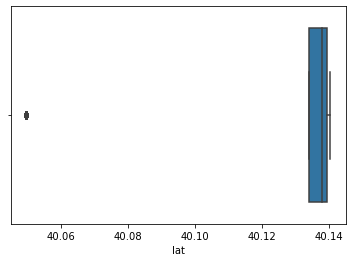

In [37]:
sns.boxplot(data=gps,x="lat") # ONE RADICAL VALUE BUT THIS NOT IMPORTANT

<AxesSubplot:xlabel='lon'>

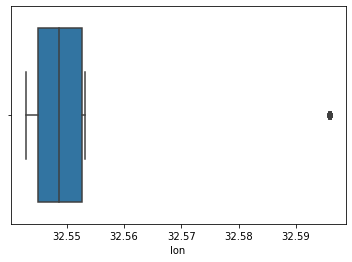

In [38]:
sns.boxplot(data=gps,x="lon") # ONE RADICAL VALUE BUT THIS NOT IMPORTANT

<AxesSubplot:xlabel='alt'>

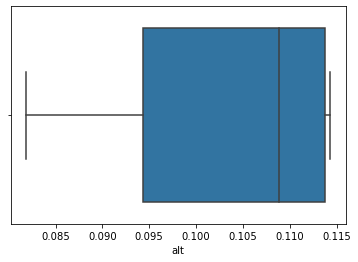

In [39]:
sns.boxplot(data=gps,x="alt") # NOT RADİCAL VALUE

# SUMMARY 

###  WE EXPERINCE 994 OF 10081 ENTRIES AS ANOMALY DETECTION

### IN GENERAL,DATA IS CLEAR.EXCEPT ANOMALY ,WE DIDNT SEEM IMPORTANTLY RADICAL VALUE VIA BOXPLOT

### THREE STRONGLY CORRELATION AMONG VARİABLE("LAT","LON","ALT") PROVEN PEARSON STATISTICAL TEST 

### BUT IN MY OPINION,(MAYBE CRITISIZE FOR  GIVEN DATA),DATA DONT PROVIDE TO REQUIREMENT TRANSPORTATION DATA TO WISDOM PROCESS.

### GOOD INVESTIGATE AND READ .)